<a href="https://colab.research.google.com/github/ilanGrynszpan/Multiligual_text_bias/blob/v2/multilingual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Opening Github project containing auxiliary files and classes

In [1]:
import os

In [12]:
if not os.path.exists('Multiligual_text_bias'):
  !git clone https://github.com/ilanGrynszpan/Multiligual_text_bias.git
else:
  !rm -rf Multiligual_text_bias
  !git clone https://github.com/ilanGrynszpan/Multiligual_text_bias.git

Cloning into 'Multiligual_text_bias'...
remote: Enumerating objects: 198, done.
remote: Counting objects: 100% (198/198), done.
remote: Compressing objects: 100% (147/147), done.
remote: Total 198 (delta 49), reused 172 (delta 35), pack-reused 0 (from 0)
Receiving objects: 100% (198/198), 5.06 MiB | 8.63 MiB/s, done.
Resolving deltas: 100% (49/49), done.


Importing classes

In [1]:
!pip install -r Multiligual_text_bias/requirements.txt

In [3]:
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import json
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import itertools
import simplemma
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from sentence_transformers import SentenceTransformer, util
from transformers import pipeline
import torch
from openai import OpenAI
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
from Multiligual_text_bias.v2.word_preprocessor import WordPreprocessor
from Multiligual_text_bias.v2.topic_modeller import TopicModeller

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Getting all articles

In [5]:
def get_sentences(sample_page, language):
  print(sample_page)
  page = requests.get(sample_page)
  soup = BeautifulSoup(page.text)
  texts = [x.getText() for x in soup.find_all('p')]
  preprocessor = WordPreprocessor(texts, language)
  complete = preprocessor.preprocess()
  return complete

In [6]:
sample_pages = ["https://en.wikipedia.org/wiki/Democracy",
                "https://es.wikipedia.org/wiki/Democracia",
                "https://pt.wikipedia.org/wiki/Democracia",
                "https://it.wikipedia.org/wiki/Democrazia",
                "https://de.wikipedia.org/wiki/Demokratie",
                "https://fr.wikipedia.org/wiki/D%C3%A9mocratie",
                "https://tr.wikipedia.org/wiki/Demokrasi",
                "https://nl.wikipedia.org/wiki/Democratie",
                "https://hu.wikipedia.org/wiki/Demokr%C3%A1cia_(politikai_rendszer)",
                "https://ru.wikipedia.org/wiki/%D0%94%D0%B5%D0%BC%D0%BE%D0%BA%D1%80%D0%B0%D1%82%D0%B8%D1%8F"
]

languages = ["english",
             "spanish",
             "portuguese",
             "italian",
             "german",
             "french",
             "turkish",
             "dutch",
             "hungarian",
             "russian"
             ]

In [7]:
sentences = [get_sentences(sample_pages[x], languages[x]) for x in range(0, len(sample_pages))]

https://en.wikipedia.org/wiki/Democracy
https://es.wikipedia.org/wiki/Democracia
https://pt.wikipedia.org/wiki/Democracia
https://it.wikipedia.org/wiki/Democrazia
https://de.wikipedia.org/wiki/Demokratie
https://fr.wikipedia.org/wiki/D%C3%A9mocratie
https://tr.wikipedia.org/wiki/Demokrasi
https://nl.wikipedia.org/wiki/Democratie
https://hu.wikipedia.org/wiki/Demokr%C3%A1cia_(politikai_rendszer)
https://ru.wikipedia.org/wiki/%D0%94%D0%B5%D0%BC%D0%BE%D0%BA%D1%80%D0%B0%D1%82%D0%B8%D1%8F


Modelling topics

In [8]:
models = []

for i in range(len(sentences)):
  tm = TopicModeller(sentences[i], languages[i], 5)
  tm.model()
  models.append(tm)

------- docs --------
[[], ['list', 'form', 'government', 'list form', 'form government', 'list form government'], ['democracy', 'ancient', 'greek', 'δημοκρατία', 'romanize', 'dēmokratía', 'dēmos', 'people', 'kratos', 'rule', 'system', 'government', 'state', 'power', 'vest', 'people', 'general', 'population', 'state', 'minimalist', 'definition', 'democracy', 'ruler', 'elect', 'competitive', 'election', 'expansive', 'definition', 'link', 'democracy', 'guarantee', 'civil', 'liberty', 'human', 'right', 'addition', 'competitive', 'election', 'democracy ancient', 'ancient greek', 'greek δημοκρατία', 'δημοκρατία romanize', 'romanize dēmokratía', 'dēmokratía dēmos', 'dēmos people', 'people kratos', 'kratos rule', 'rule system', 'system government', 'government state', 'state power', 'power vest', 'vest people', 'people general', 'general population', 'population state', 'state minimalist', 'minimalist definition', 'definition democracy', 'democracy ruler', 'ruler elect', 'elect competitive', 

------- docs --------
[['démocratie', 'grec', 'ancien', 'δημοκρατία', 'dēmokratía', 'combinaison', 'δῆμος', 'dêmos', 'peuple', 'δαίομαι', 'daíomai', 'distribuer', 'répartir', 'κράτος', 'krátos', 'pouvoir', 'dérivé', 'verbe', 'κρατέω', 'kratéô', 'commander', 'lorigine', 'régime', 'politique', 'lequel', 'tout', 'citoyen', 'participer', 'décision', 'public', 'vie', 'politique', 'cité', 'dispositif', 'seffectuait', 'manière', 'direct', 'soumettre', 'décision', 'vote', 'tout', 'citoyen', 'manière', 'indirect', 'représentant', 'préalablement', 'désigné', 'façon', 'aléatoire', 'élection', 'faire', 'proposition', 'loi', 'prendre', 'décision', 'urgent', 'terme', 'désigner', 'aujourdhui', 'tout', 'système', 'politique', 'lequel', 'peuple', 'souverain', 'extension', 'démocratie', 'pouvoir', 'aussi', 'qualifier', 'forme', 'société', 'manière', 'gouverner', 'quadopte', 'organisation', 'encore', 'système', 'valeur', 'démocratie grec', 'grec ancien', 'ancien δημοκρατία', 'δημοκρατία dēmokratía', 'dēm

english


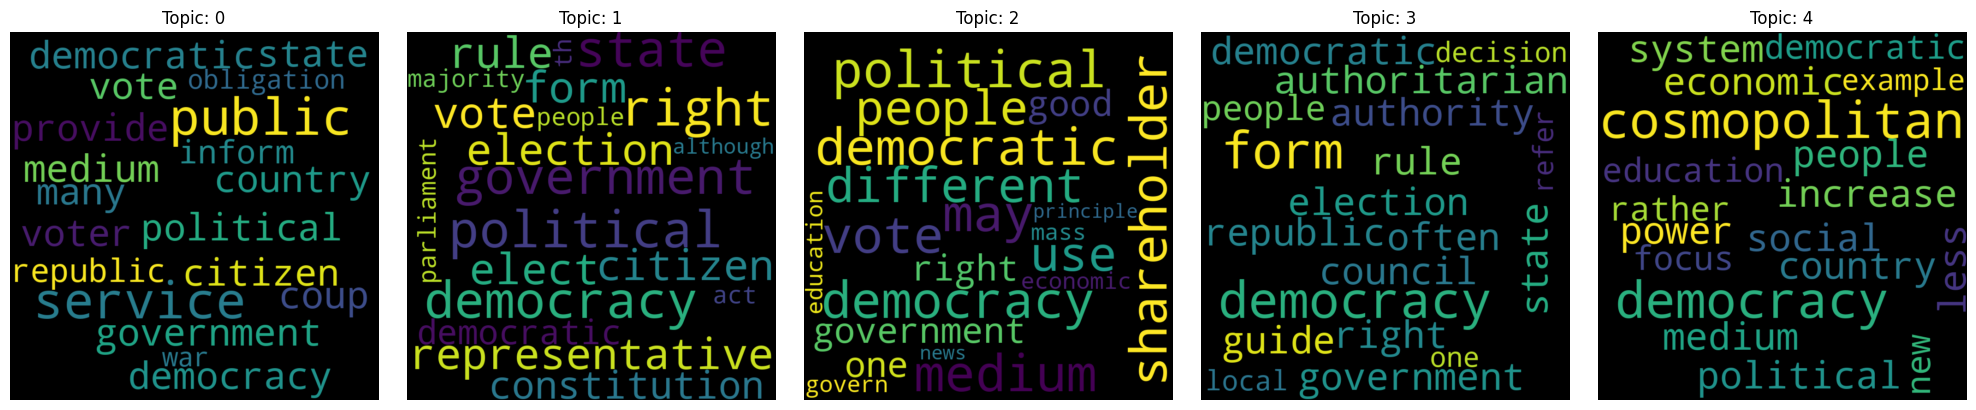

spanish


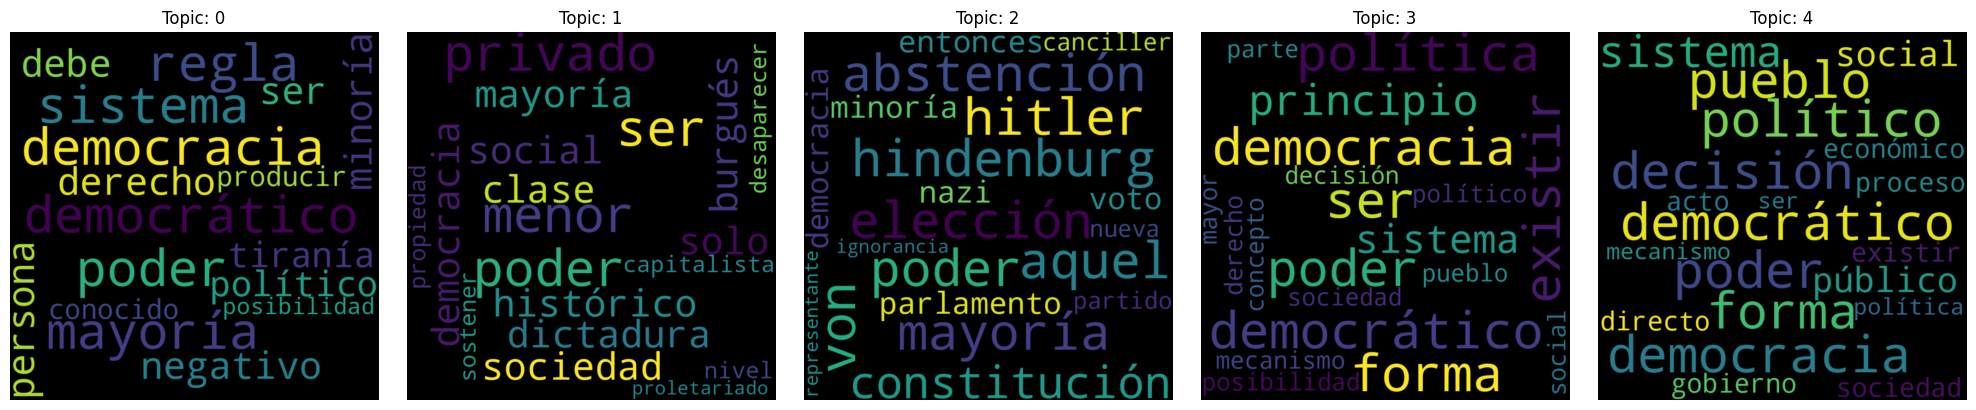

portuguese


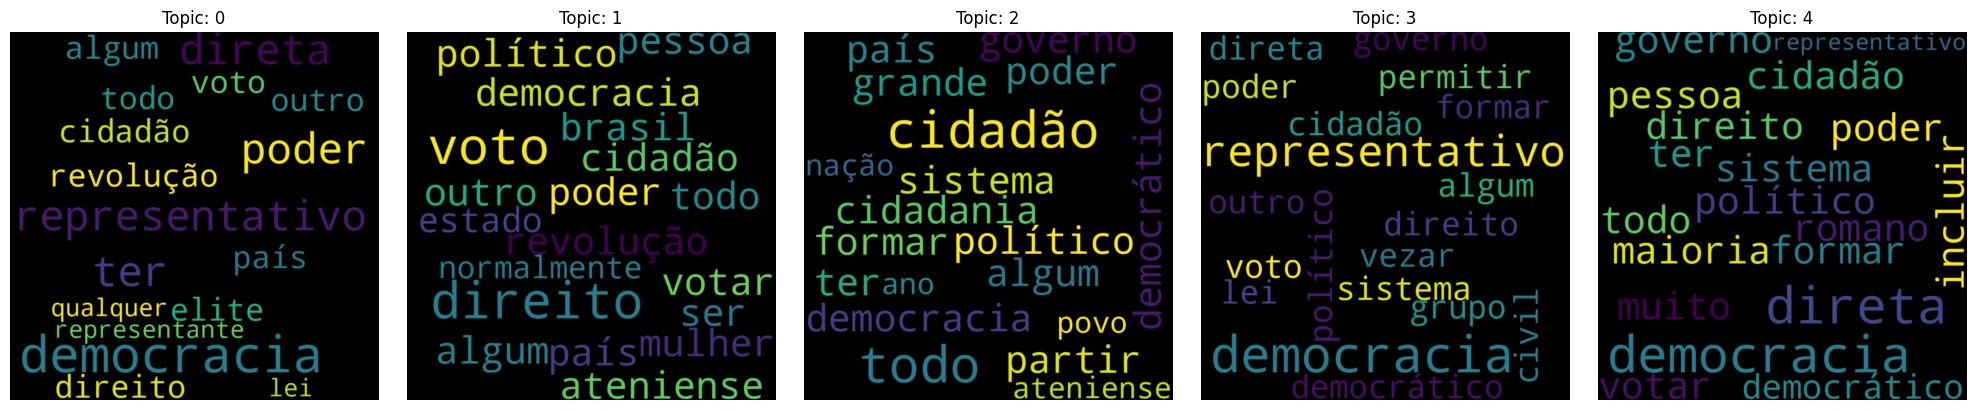

italian


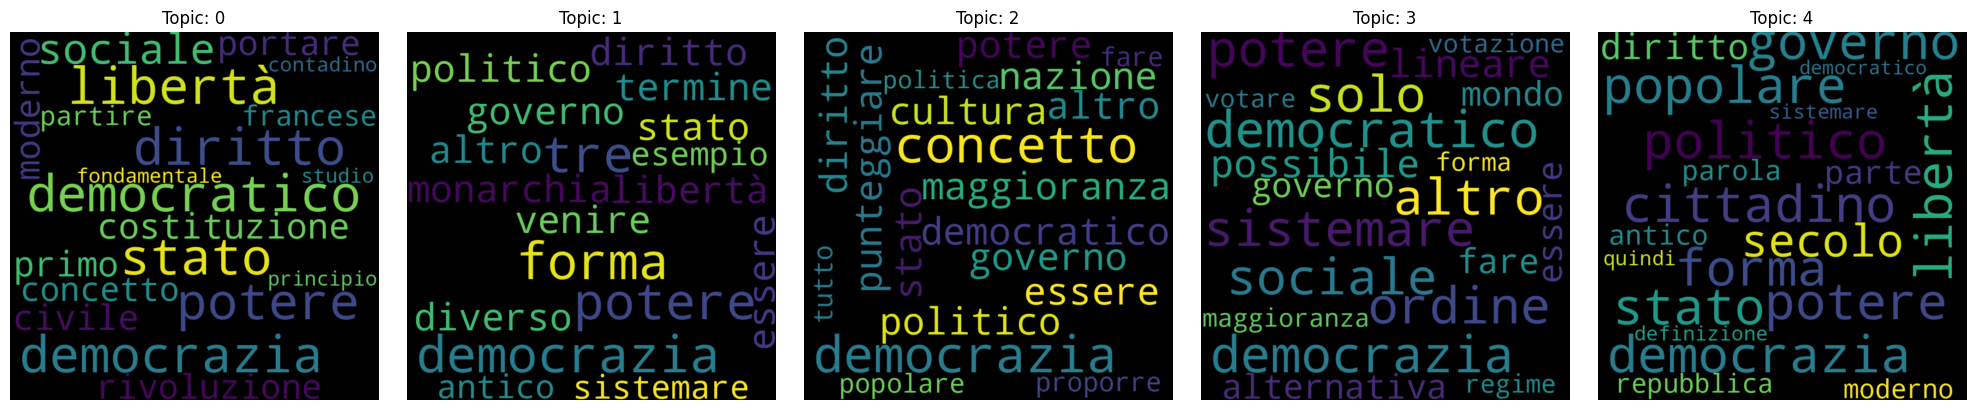

german


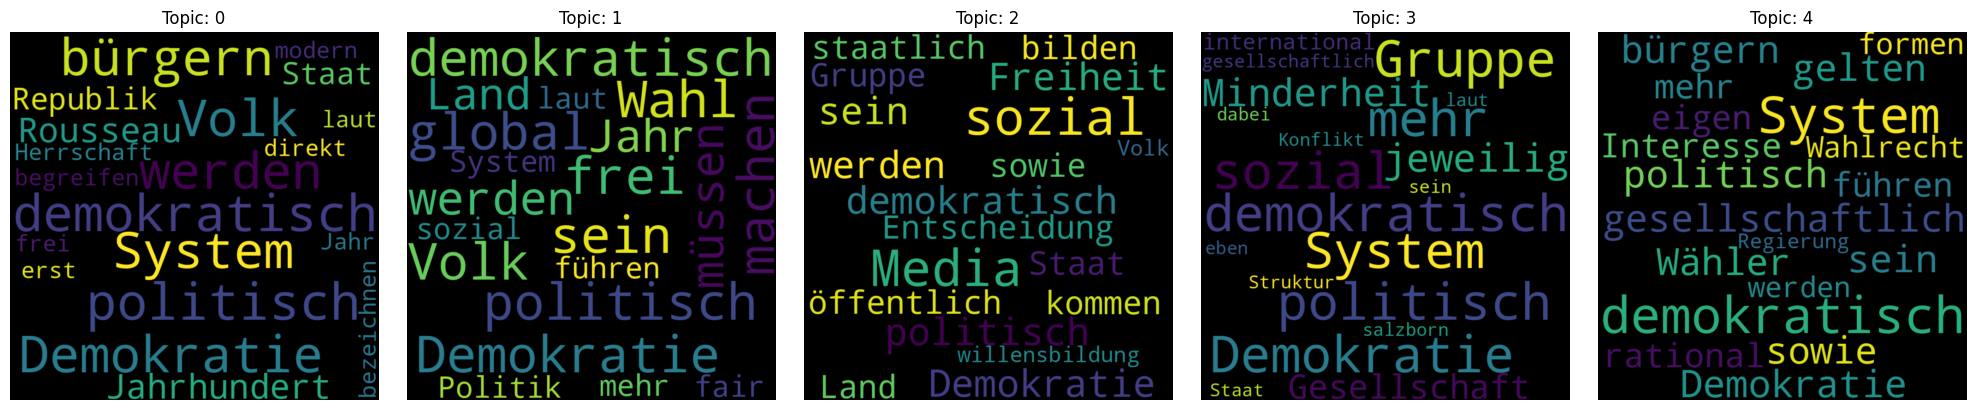

french


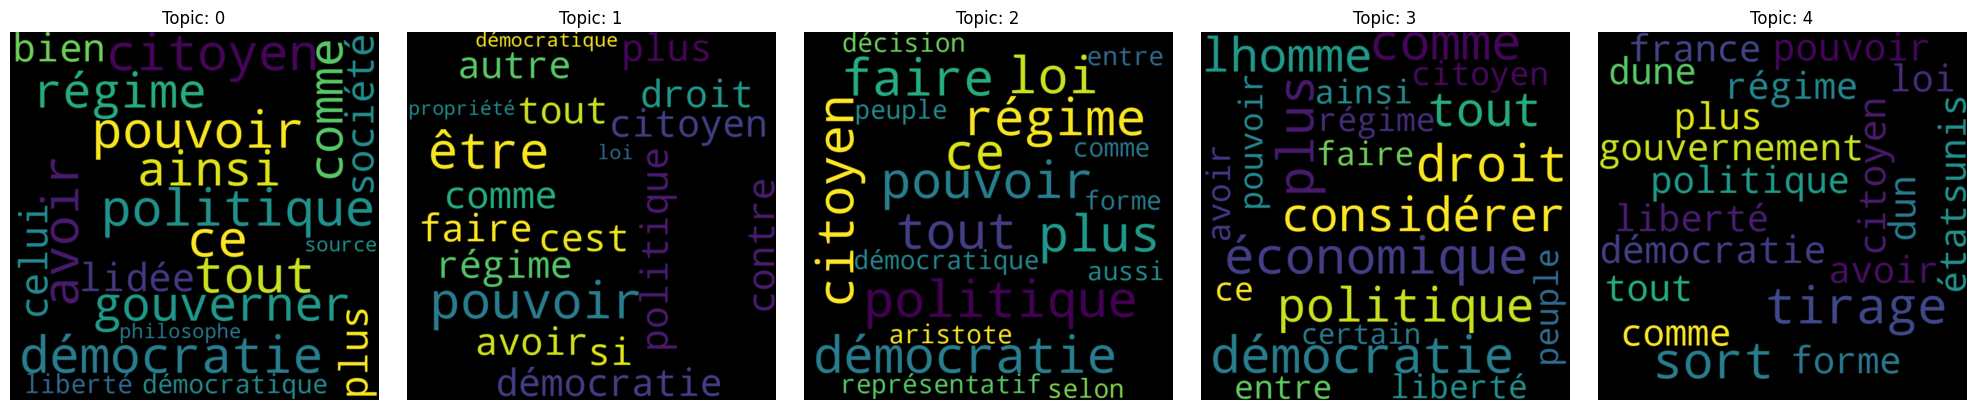

turkish


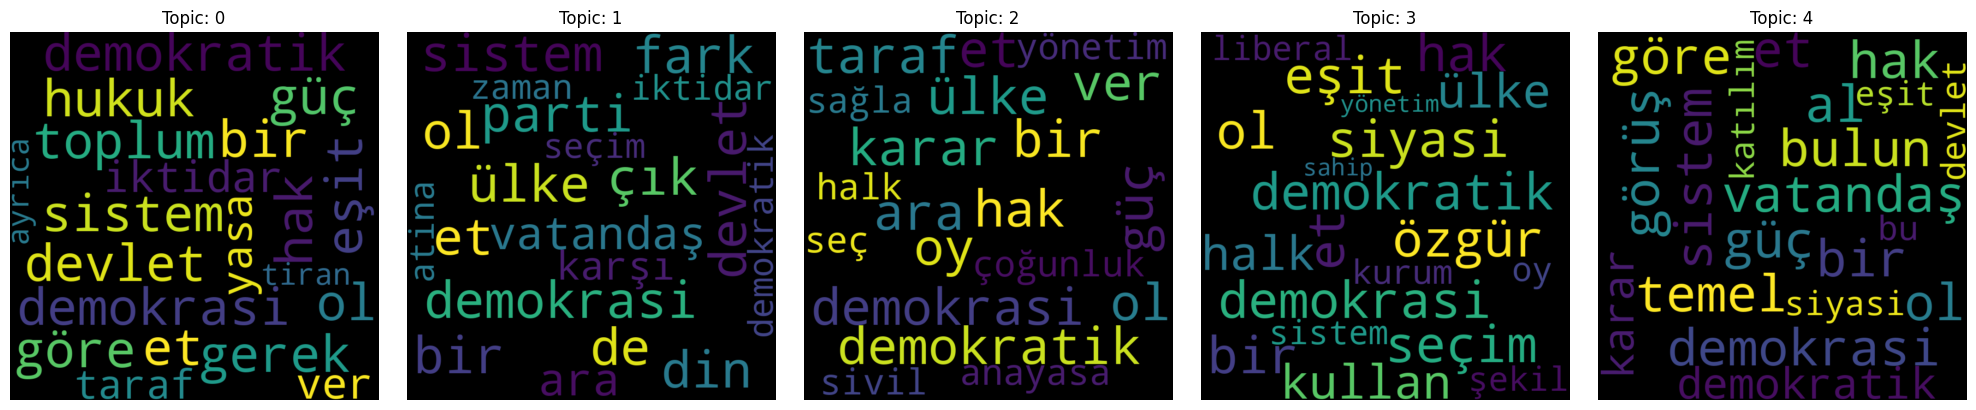

dutch


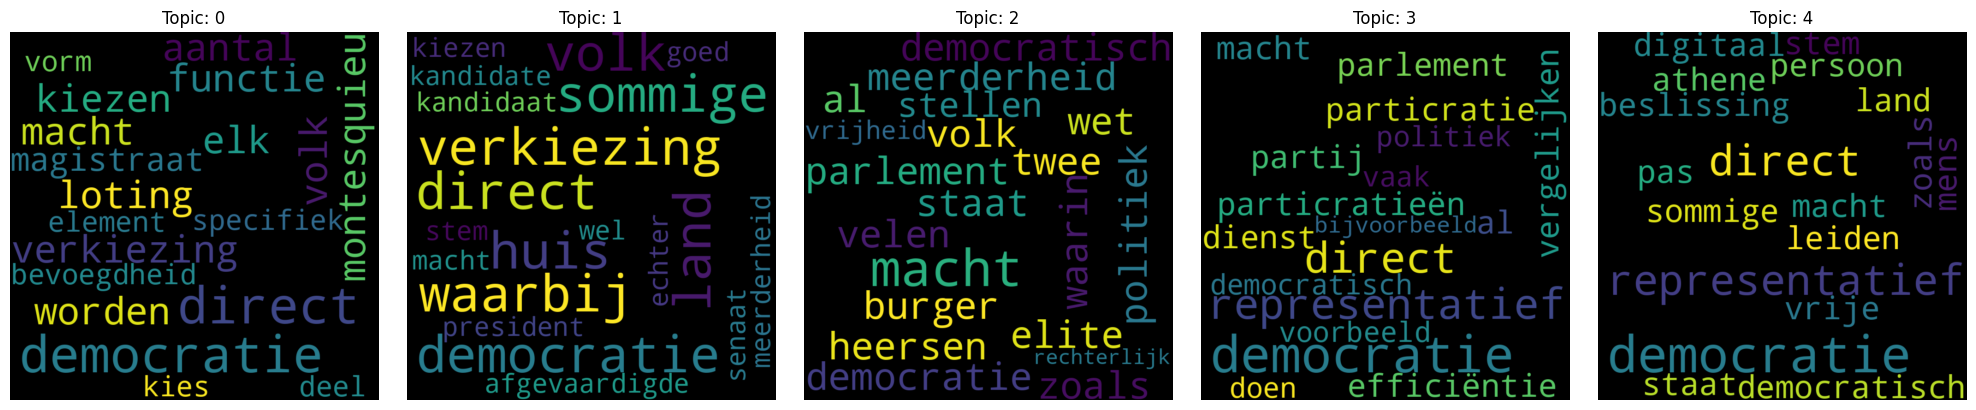

hungarian


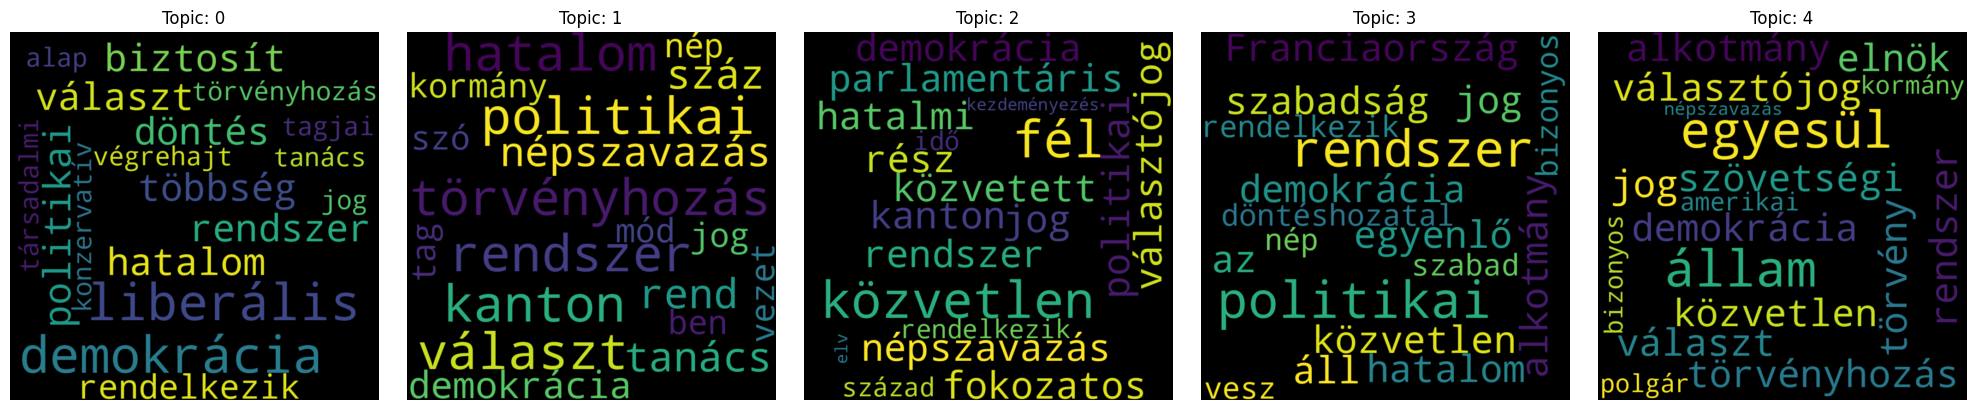

russian


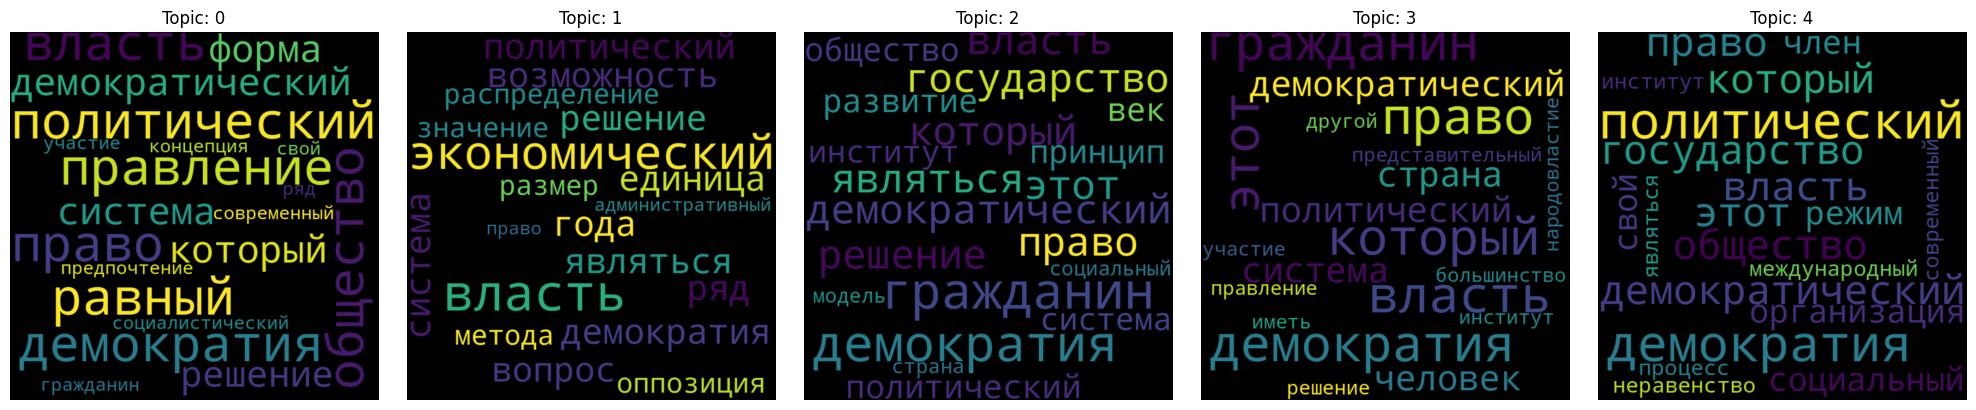

In [9]:
for i in range(len(models)):
  print(languages[i])
  models[i].plotWordCloud(num_words=20, num_cols=5)